## Preparing the Data and Introducing Matplotlib

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Data: immigration of nationals in EU28 countries, 2009-2018.

# Source: https://commonslibrary.parliament.uk/research-briefings/sn06077/

df_immigration = pd.read_excel('CBP06077-data.xlsx',
                              sheet_name = "4 (1)",
                              skiprows = range(3))

In [3]:
df_immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  33 non-null     object 
 2   2009        28 non-null     object 
 3   2010        28 non-null     object 
 4   2011        28 non-null     object 
 5   2012        28 non-null     float64
 6   2013        28 non-null     float64
 7   2014        28 non-null     float64
 8   2015        28 non-null     float64
 9   2016        28 non-null     float64
 10  2017        28 non-null     float64
 11  2018        28 non-null     float64
dtypes: float64(8), object(4)
memory usage: 3.6+ KB


## Data Cleaning

In [4]:
df_immigration.head()

,Unnamed: 0,Unnamed: 1,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,Germany,266104,317193,398913,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
1,NaN,Spain,365360,330280,335881,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
2,NaN,United Kingdom,470544,497629,487614,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
3,NaN,Italy,406725,424499,354327,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
4,NaN,France,171702,192870,200162,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0


In [5]:
df_immigration.tail()

,Unnamed: 0,Unnamed: 1,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
32,NaN,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,. Indicates that the data is not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,"Eurostat, Immigration by sex, age group and ci...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,"Eurostat, Emigration by sex, age group and cit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_immigration.tail(10)

,Unnamed: 0,Unnamed: 1,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
27,NaN,Slovakia,5141,4161,3751,2940.0,2475.0,2418.0,3774.0,3610.0,2911.0,2869.0
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,. Indicates that the data is not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,Sources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,"Eurostat, Immigration by sex, age group and ci...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,"Eurostat, Emigration by sex, age group and cit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Dropping rows that have missing data
df_immigration.drop(range(28, 37), inplace = True)
df_immigration.tail()

,Unnamed: 0,Unnamed: 1,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
23,NaN,Bulgaria,.,.,.,9125.0,13794.0,17028.0,14394.0,11954.0,12510.0,13364.0
24,NaN,Lithuania,1666,1060,1673,2486.0,3036.0,4766.0,3747.0,5955.0,10213.0,12322.0
25,NaN,Estonia,2228,1197,1674,1106.0,1637.0,1344.0,7367.0,7693.0,9055.0,9618.0
26,NaN,Latvia,.,.,2861,3666.0,3524.0,4446.0,4469.0,3419.0,5125.0,6534.0
27,NaN,Slovakia,5141,4161,3751,2940.0,2475.0,2418.0,3774.0,3610.0,2911.0,2869.0


In [8]:
df_immigration.rename(columns = {'Unnamed: 1': 'Country'}, inplace = True)
df_immigration.head()

,Unnamed: 0,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,Germany,266104,317193,398913,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
1,NaN,Spain,365360,330280,335881,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
2,NaN,United Kingdom,470544,497629,487614,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
3,NaN,Italy,406725,424499,354327,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
4,NaN,France,171702,192870,200162,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0


In [9]:
df_immigration.drop(columns = "Unnamed: 0", inplace = True)

In [10]:
df_immigration.Country.replace({'Germany ': 'Germany'})

0            Germany
1              Spain
2     United Kingdom
3              Italy
4             France
5        Netherlands
6            Belgium
7             Sweden
8            Austria
9             Poland
10            Greece
11           Ireland
12    Czech Republic
13           Hungary
14           Denmark
15           Romania
16             Malta
17          Slovenia
18        Luxembourg
19          Portugal
20           Finland
21            Cyprus
22           Croatia
23          Bulgaria
24         Lithuania
25           Estonia
26            Latvia
27          Slovakia
Name: Country, dtype: object

In [11]:
df_immigration.isnull().sum()

Country    0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64

In [12]:
df_immigration.dtypes

Country     object
2009        object
2010        object
2011        object
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
dtype: object

In [13]:
df_immigration.replace(".", np.nan)

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
1,Spain,365360.0,330280.0,335881.0,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
2,United Kingdom,470544.0,497629.0,487614.0,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
3,Italy,406725.0,424499.0,354327.0,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
4,France,171702.0,192870.0,200162.0,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0
5,Netherlands,75180.0,78905.0,84541.0,82966.0,93055.0,107837.0,126002.0,144750.0,143700.0,146740.0
6,Belgium,NaN,116354.0,131846.0,115331.0,105379.0,106047.0,127654.0,105368.0,108497.0,118847.0
7,Sweden,83472.0,78681.0,75546.0,82267.0,94922.0,105575.0,113357.0,142452.0,124396.0,113986.0
8,Austria,60233.0,62128.0,74119.0,83242.0,92585.0,106932.0,156543.0,119635.0,102015.0,95995.0
9,Poland,46730.0,47638.0,55012.0,81516.0,88724.0,94326.0,133321.0,102858.0,76565.0,95666.0


Now that all the non-data entries have been filled with NaN, convert the columns that were affected by the "." (and hence where type "object" and not "int64") to "int64.""

In [14]:
df_immigration.replace(".", np.nan, inplace = True)
df_immigration

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
1,Spain,365360.0,330280.0,335881.0,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
2,United Kingdom,470544.0,497629.0,487614.0,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
3,Italy,406725.0,424499.0,354327.0,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
4,France,171702.0,192870.0,200162.0,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0
5,Netherlands,75180.0,78905.0,84541.0,82966.0,93055.0,107837.0,126002.0,144750.0,143700.0,146740.0
6,Belgium,NaN,116354.0,131846.0,115331.0,105379.0,106047.0,127654.0,105368.0,108497.0,118847.0
7,Sweden,83472.0,78681.0,75546.0,82267.0,94922.0,105575.0,113357.0,142452.0,124396.0,113986.0
8,Austria,60233.0,62128.0,74119.0,83242.0,92585.0,106932.0,156543.0,119635.0,102015.0,95995.0
9,Poland,46730.0,47638.0,55012.0,81516.0,88724.0,94326.0,133321.0,102858.0,76565.0,95666.0


In [15]:
# Type Conversion
df_immigration[[2009, 2010, 2011]] = df_immigration[[2009, 2010, 2011]].astype("float")

#Show the types
df_immigration.dtypes

Country     object
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
dtype: object

In [16]:
df_immigration

,Country,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
1,Spain,365360.0,330280.0,335881.0,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
2,United Kingdom,470544.0,497629.0,487614.0,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
3,Italy,406725.0,424499.0,354327.0,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
4,France,171702.0,192870.0,200162.0,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0
5,Netherlands,75180.0,78905.0,84541.0,82966.0,93055.0,107837.0,126002.0,144750.0,143700.0,146740.0
6,Belgium,NaN,116354.0,131846.0,115331.0,105379.0,106047.0,127654.0,105368.0,108497.0,118847.0
7,Sweden,83472.0,78681.0,75546.0,82267.0,94922.0,105575.0,113357.0,142452.0,124396.0,113986.0
8,Austria,60233.0,62128.0,74119.0,83242.0,92585.0,106932.0,156543.0,119635.0,102015.0,95995.0
9,Poland,46730.0,47638.0,55012.0,81516.0,88724.0,94326.0,133321.0,102858.0,76565.0,95666.0


In [17]:
df_immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  28 non-null     object 
 1   2009     25 non-null     float64
 2   2010     25 non-null     float64
 3   2011     27 non-null     float64
 4   2012     28 non-null     float64
 5   2013     28 non-null     float64
 6   2014     28 non-null     float64
 7   2015     28 non-null     float64
 8   2016     28 non-null     float64
 9   2017     28 non-null     float64
 10  2018     28 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.5+ KB


In [18]:
df_immigration.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,25.000000,25.000000,27.000000,28.000000,28.000000,28.000000,2.800000e+01,28.000000,28.000000,28.000000
mean,90051.760000,94885.640000,90701.407407,87332.642857,91533.250000,103478.428571,1.352719e+05,119356.821429,119952.071429,124259.714286
std,136224.833523,142464.182344,138392.902476,133908.075584,146017.091661,179347.528067,2.866304e+05,197004.238255,189995.323716,187471.892468
min,1666.000000,1060.000000,1673.000000,1106.000000,1637.000000,1344.000000,3.747000e+03,3419.000000,2911.000000,2869.000000
25%,14424.000000,12657.000000,8535.500000,8468.750000,10898.500000,10807.750000,1.396175e+04,13815.500000,16172.500000,21416.500000
50%,32342.000000,32642.000000,22305.000000,25204.500000,24097.000000,25066.500000,2.545100e+04,40754.000000,41878.500000,47281.500000
75%,75180.000000,78905.000000,80043.500000,83035.000000,93521.750000,106268.250000,1.290708e+05,125339.250000,112471.750000,115201.250000
max,470544.000000,497629.000000,487614.000000,503610.000000,606799.000000,790248.000000,1.459919e+06,912788.000000,788874.000000,742505.000000


In [19]:
df_immigration.columns.tolist()

['Country', 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

## Visualisation

In [20]:
#See the styles in a list

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
mpl.style.use(['seaborn'])

In [22]:
#Make the 'Country' column the index
df_immigration.set_index('Country', inplace = True)

df_immigration.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
Spain,365360.0,330280.0,335881.0,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
United Kingdom,470544.0,497629.0,487614.0,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
Italy,406725.0,424499.0,354327.0,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
France,171702.0,192870.0,200162.0,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0


In [23]:
greece = df_immigration.loc['Greece', [2009, 2010, 2011, 2012, 2013, 2014, 2015]]
greece.head()

2009    35823.0
2010    35384.0
2011    33046.0
2012    32006.0
2013    31302.0
Name: Greece, dtype: float64

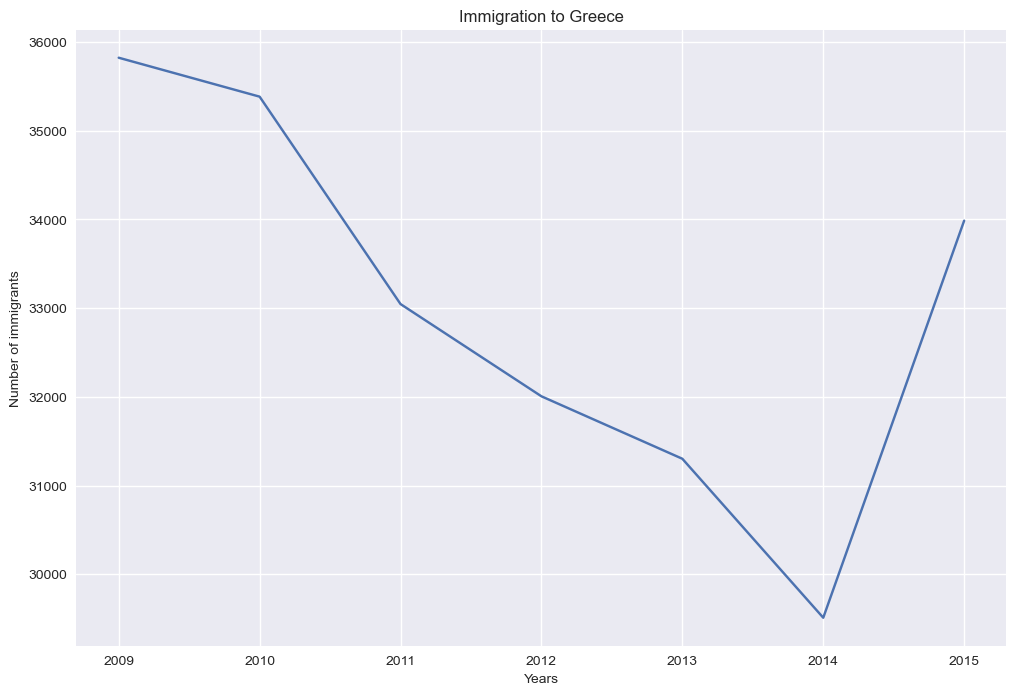

In [24]:
greece.plot(kind = 'line', figsize = (12, 8))

plt.title('Immigration to Greece')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

annotation...

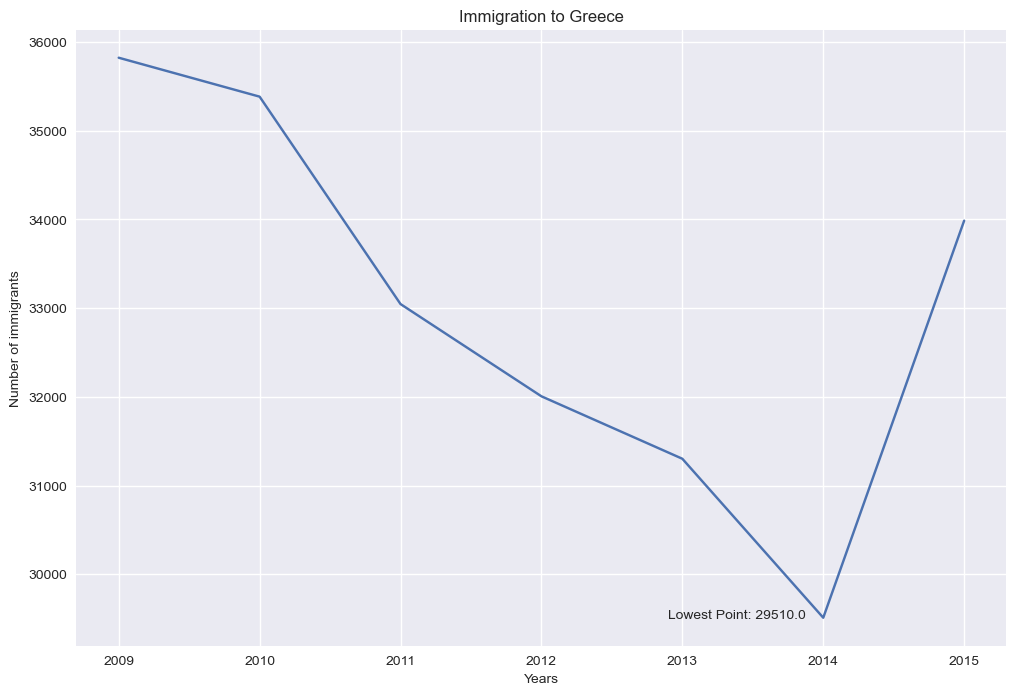

In [25]:
greece.plot(kind = 'line', figsize = (12, 8))

plt.title('Immigration to Greece')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2012.9, 29500, 'Lowest Point: '+str(greece[2014]))

plt.show()

In [26]:
df_gg = df_immigration.loc[['Greece', 'Germany '], [2009, 2010, 2011, 2012, 2013, 2014, 2015]]
df_gg.head()

,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,
Greece,35823.0,35384.0,33046.0,32006.0,31302.0,29510.0,33986.0
Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0


<Axes: xlabel='Country'>

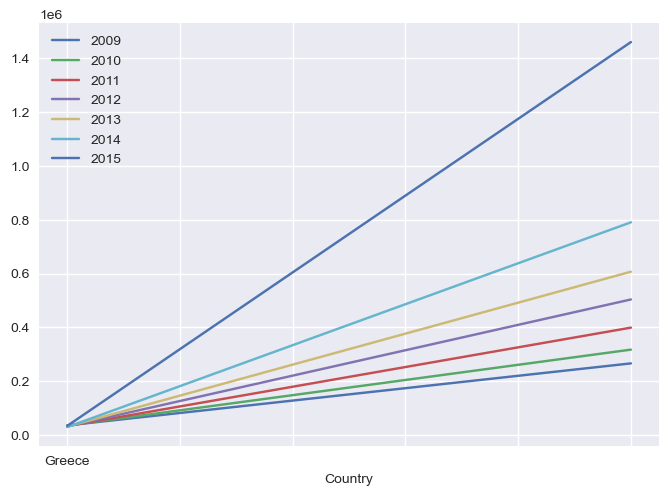

In [27]:
#Plotting both Greece and Germany

df_gg.plot()

It seems that with greece (on its own) it plotted well because Greece is of a different type.

In [28]:
type(greece)

pandas.core.series.Series

In [29]:
type(df_gg)

pandas.core.frame.DataFrame

In [30]:
greece.head()

2009    35823.0
2010    35384.0
2011    33046.0
2012    32006.0
2013    31302.0
Name: Greece, dtype: float64

Convert the dataframe so that the years are the indices, just like in greece.

In [31]:
df_gg.head()

,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,
Greece,35823.0,35384.0,33046.0,32006.0,31302.0,29510.0,33986.0
Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0


In [32]:
df_gg.transpose()

Country,Greece,Germany
2009,35823.0,266104.0
2010,35384.0,317193.0
2011,33046.0,398913.0
2012,32006.0,503610.0
2013,31302.0,606799.0
2014,29510.0,790248.0
2015,33986.0,1459919.0


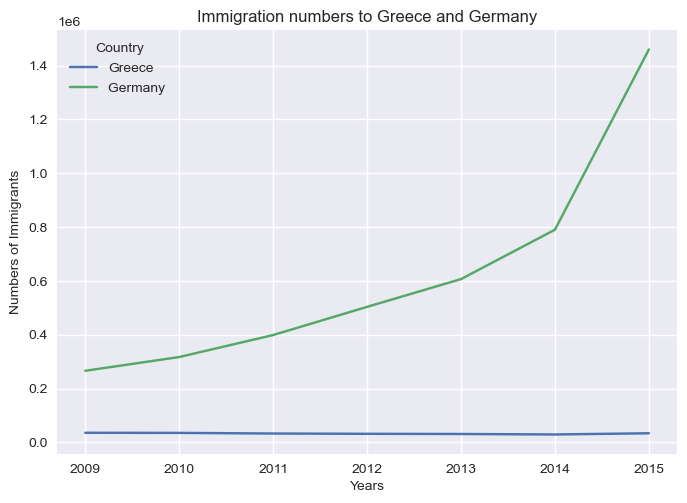

In [33]:
df_gg = df_gg.transpose()

df_gg.plot(kind = 'line')

plt.title ('Immigration numbers to Greece and Germany')
plt.ylabel ('Numbers of Immigrants')
plt.xlabel ('Years')

plt.show()

Can this be right? Looking at the columns, the magnitude of immigration to Germany is in hundreds of thousands and in 2015 it surpases one million; in Greece the magnitude is in the tends of thousands, hence the graph is not a good way of "comparing".

One way is to make the values of each column relative to the maximum value of the column.

In [37]:
ndf_gg = pd.DataFrame()
ndf_gg[['Germany']] = df_gg[['Germany ']]/df_gg[['Germany ']].max()
ndf_gg[['Greece']] = df_gg[['Greece']]/df_gg[['Greece']].max()
ndf_gg

,Germany,Greece
2009,0.182273,1.000000
2010,0.217268,0.987745
2011,0.273243,0.922480
2012,0.344957,0.893448
2013,0.415639,0.873796
2014,0.541296,0.823772
2015,1.000000,0.948720


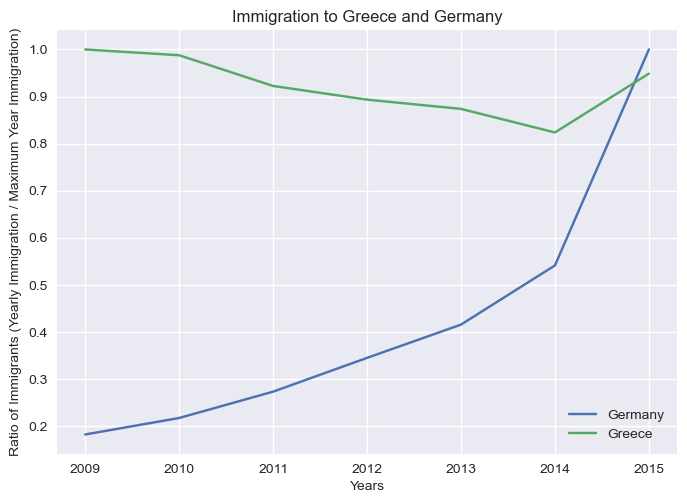

In [38]:
ndf_gg.plot()

plt.title ('Immigration to Greece and Germany')
plt.ylabel ('Ratio of Immigrants (Yearly Immigration / Maximum Year Immigration)')
plt.xlabel ('Years')

plt.show()

## Area Plots

In [39]:
df_immigration.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0
Spain,365360.0,330280.0,335881.0,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0
United Kingdom,470544.0,497629.0,487614.0,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0
Italy,406725.0,424499.0,354327.0,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0
France,171702.0,192870.0,200162.0,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0


In [40]:
df_immigration['Total']=df_immigration.sum(axis = 1)
df_immigration.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total
Country,,,,,,,,,,,
Germany,266104.0,317193.0,398913.0,503610.0,606799.0,790248.0,1459919.0,912788.0,788874.0,742505.0,6786953.0
Spain,365360.0,330280.0,335881.0,272482.0,248350.0,264486.0,290005.0,352173.0,453950.0,559998.0,3472965.0
United Kingdom,470544.0,497629.0,487614.0,417844.0,449910.0,550740.0,547828.0,514783.0,563356.0,527011.0,5027259.0
Italy,406725.0,424499.0,354327.0,321305.0,279021.0,248360.0,250026.0,262929.0,301071.0,285500.0,3133763.0
France,171702.0,192870.0,200162.0,211679.0,218108.0,214038.0,232961.0,240582.0,241750.0,255185.0,2179037.0


Plot the top 3 countries in terms of immigration in the years 2009 - 2013

In [41]:
df_immigration.sort_values(['Total'], ascending = False, axis = 0, inplace = True)

df_top3 = df_immigration.head(3)

df_top3 = df_top3[[2009, 2010, 2011, 2012, 2013]]

df_top3 = df_top3.transpose()

In [42]:
df_top3.head()

Country,Germany,United Kingdom,Spain
2009,266104.0,470544.0,365360.0
2010,317193.0,497629.0,330280.0
2011,398913.0,487614.0,335881.0
2012,503610.0,417844.0,272482.0
2013,606799.0,449910.0,248350.0


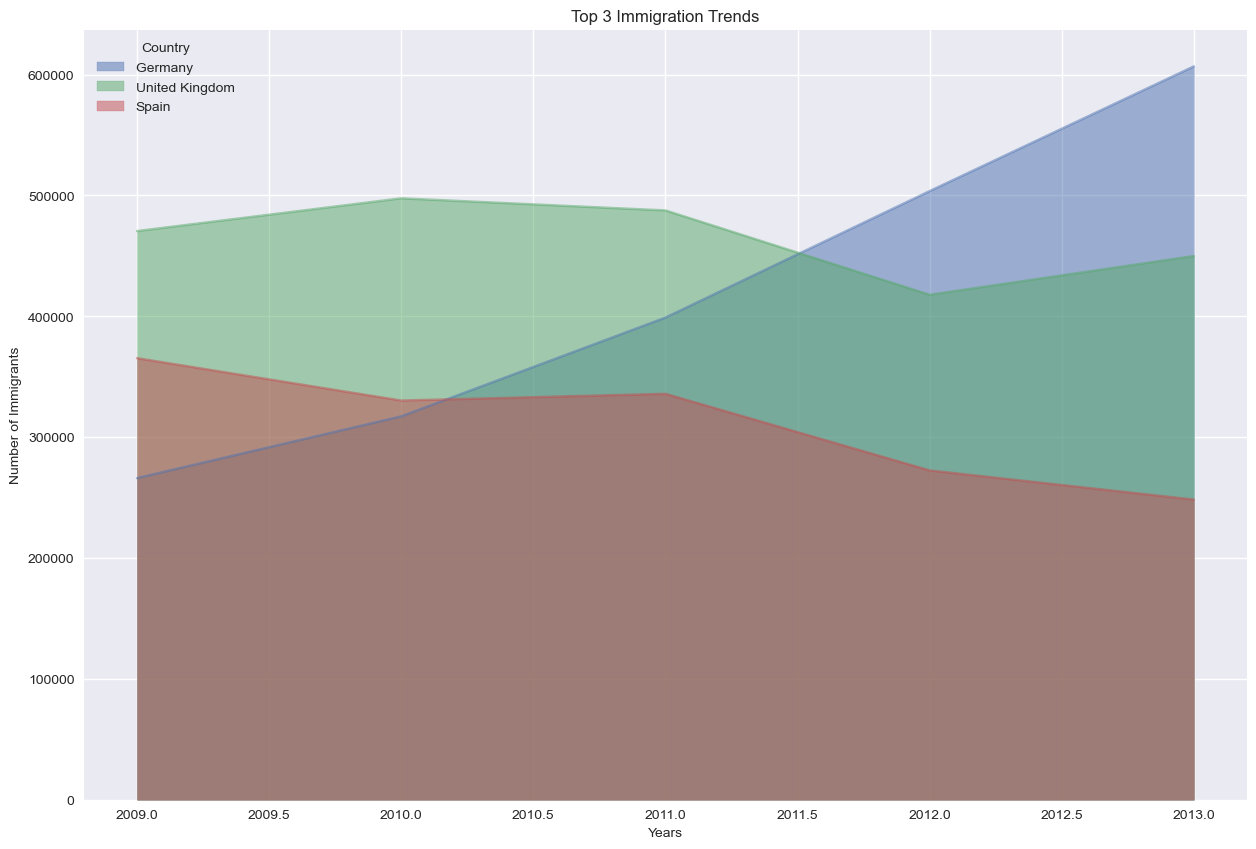

In [43]:
df_top3.plot(kind = 'area', stacked = False, figsize=(15, 10))

plt.title ('Top 3 Immigration Trends')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

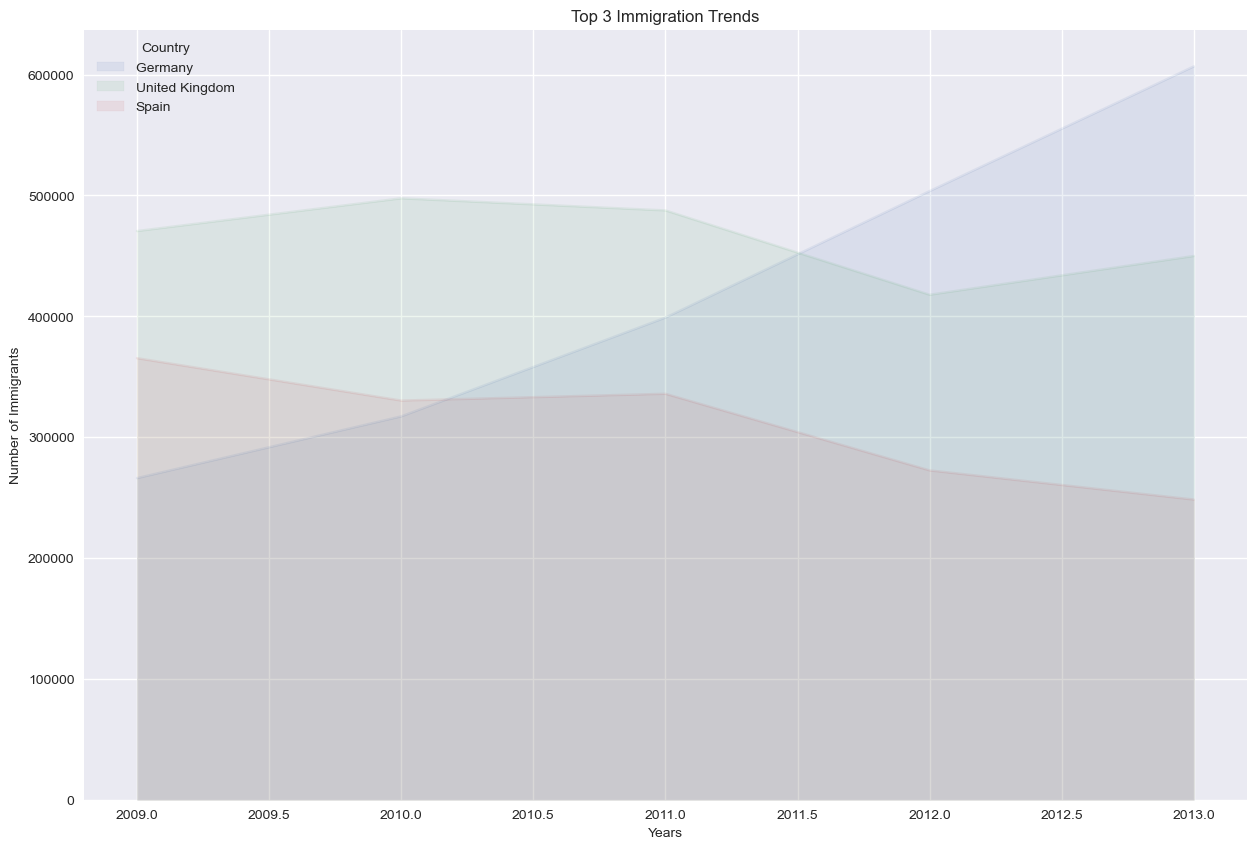

In [44]:
# Change the transparency values, the default being alpha = 0.5

df_top3.plot(kind = 'area', alpha = 0.1, stacked = False, figsize=(15, 10))

plt.title ('Top 3 Immigration Trends')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

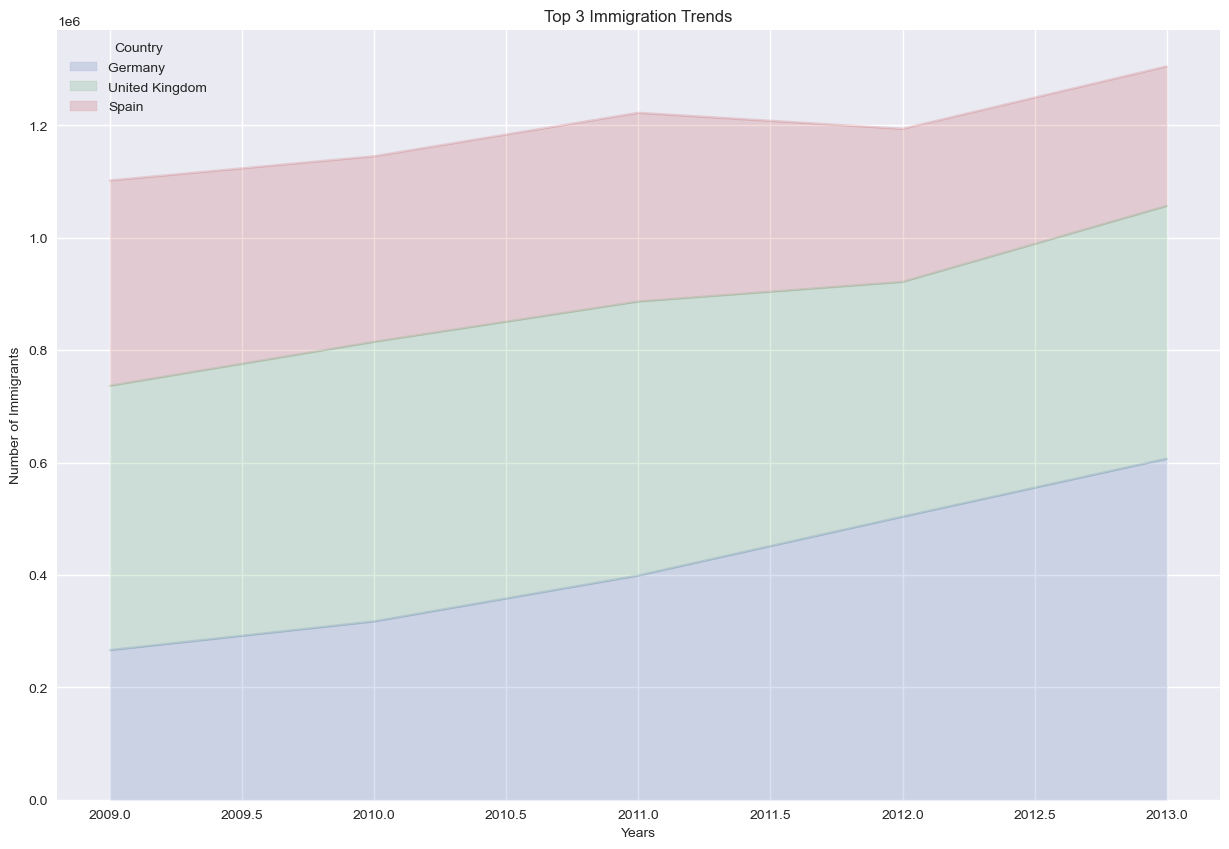

In [46]:
# Stack it by removing the "stacked = False" option (or by setting it to "True")

df_top3.plot(kind = 'area', alpha = 0.2, figsize=(15, 10))

plt.title ('Top 3 Immigration Trends')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Bar Plots: Vertical and Horizontal

Focus on Germany given its remarkable numbers of immigration.

In [48]:
df_germany = df_immigration.loc['Germany ']

df_germany.head()

2009    266104.0
2010    317193.0
2011    398913.0
2012    503610.0
2013    606799.0
Name: Germany , dtype: float64

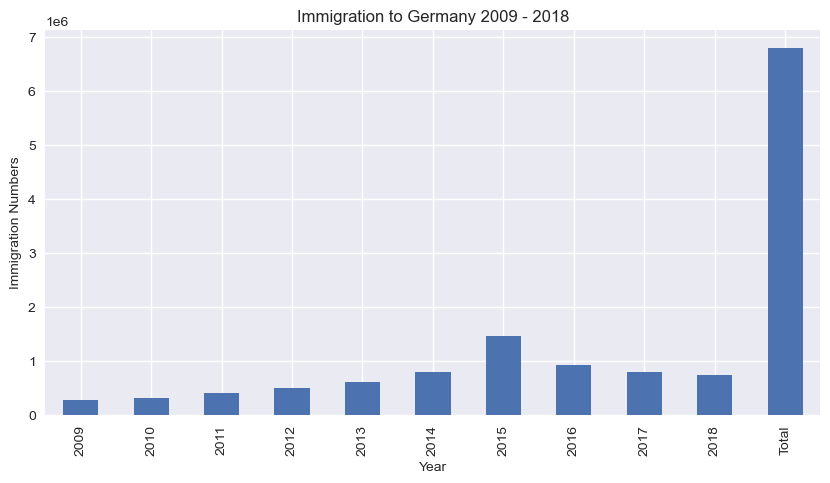

In [49]:
df_germany.plot(kind = 'bar', figsize=(10, 5))

plt.xlabel('Year')
plt.ylabel('Immigration Numbers')
plt.title('Immigration to Germany 2009 - 2018')

plt.show()

Removing the "total" bar from the dataframe.

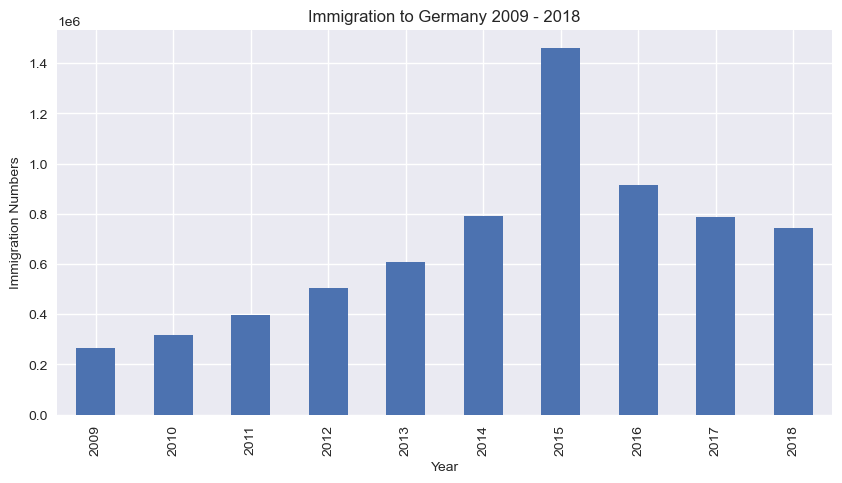

In [50]:
df_germany.drop(['Total'], inplace = True)

df_germany.plot(kind = 'bar', figsize=(10, 5))

plt.xlabel('Year')
plt.ylabel('Immigration Numbers')
plt.title('Immigration to Germany 2009 - 2018')

plt.show()

It seems that immigration to Germany was steadily increasing since 2009 and was doubled from 2014 to 2015, and then it returned to "normal" after that incredible surge. 

Try annotation of graph.

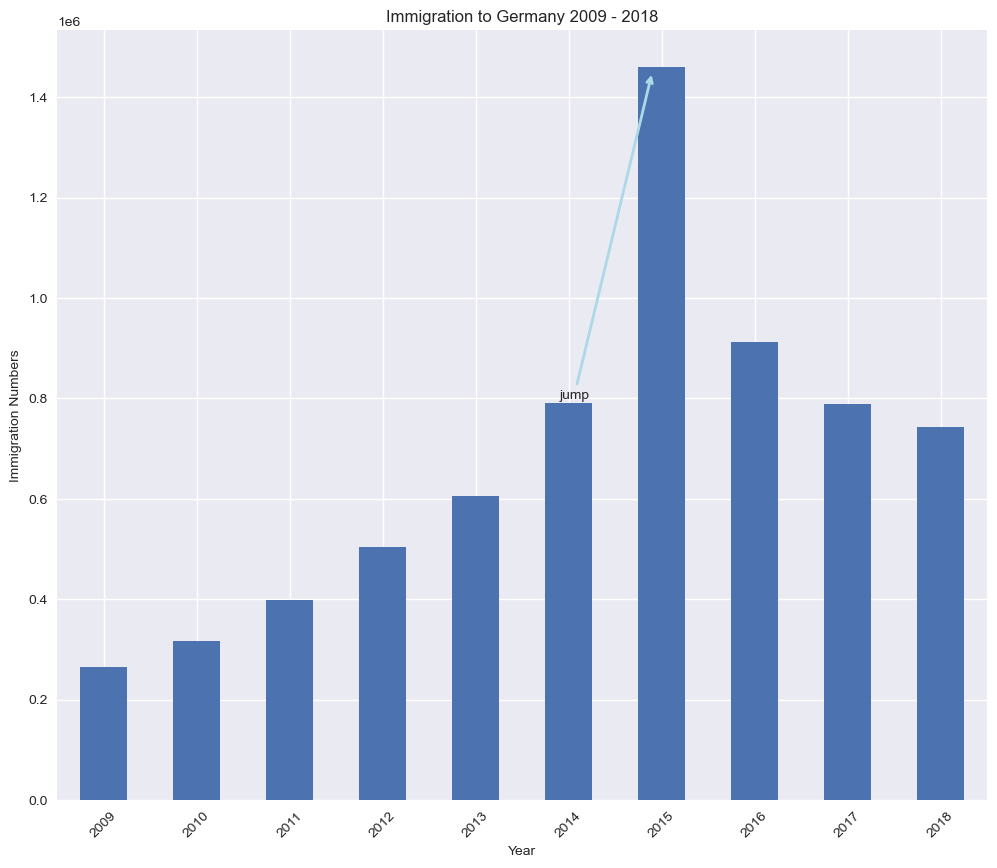

In [51]:
df_germany.plot(kind = 'bar', figsize=(12, 10), rot = 45)

plt.xlabel('Year')
plt.ylabel('Immigration Numbers')
plt.title('Immigration to Germany 2009 - 2018')

plt.annotate('jump',
            xy = (5.9, 1.45*10**6),
            xytext = (4.9, 0.8*10**6),
            xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'lightblue', lw = 2))

plt.show()

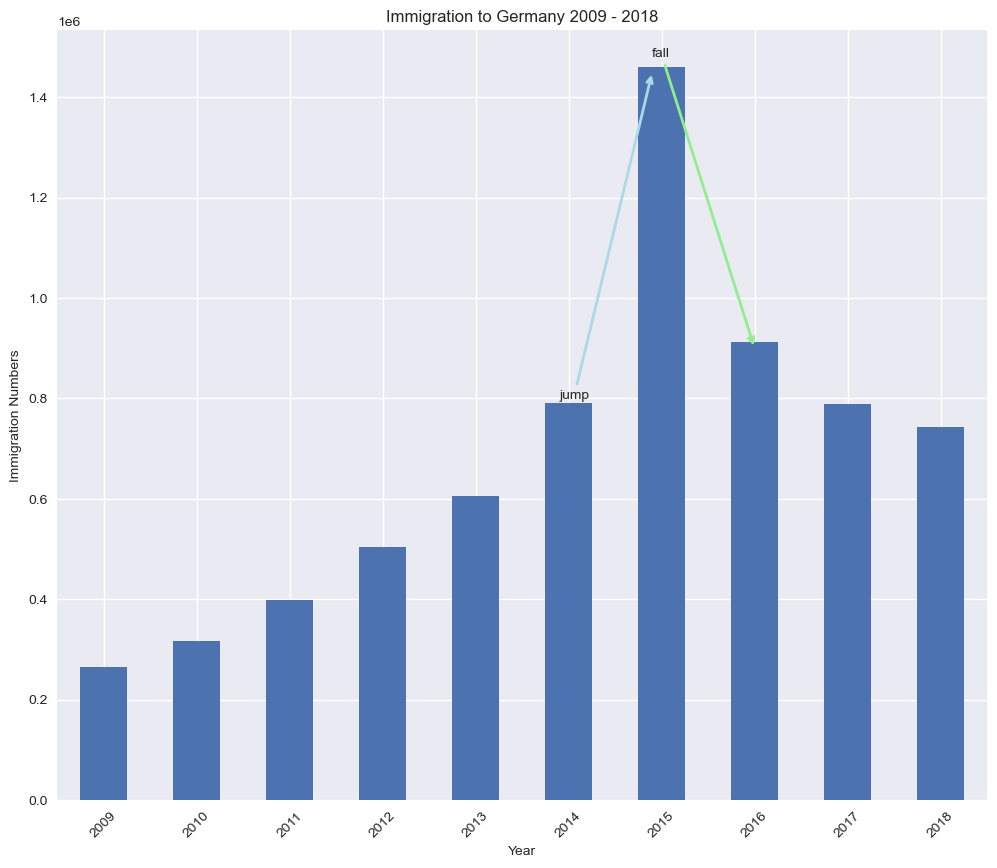

In [52]:
df_germany.plot(kind = 'bar', figsize=(12, 10), rot = 45)

plt.xlabel('Year')
plt.ylabel('Immigration Numbers')
plt.title('Immigration to Germany 2009 - 2018')

plt.annotate('jump',
            xy = (5.9, 1.45*10**6),
            xytext = (4.9, 0.8*10**6),
            xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'lightblue', lw = 2))

plt.annotate('fall',
            xy = (7, 0.9*10**6),
            xytext = (5.9, 1.48*10**6),
            xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'lightgreen', lw = 2))

plt.show()

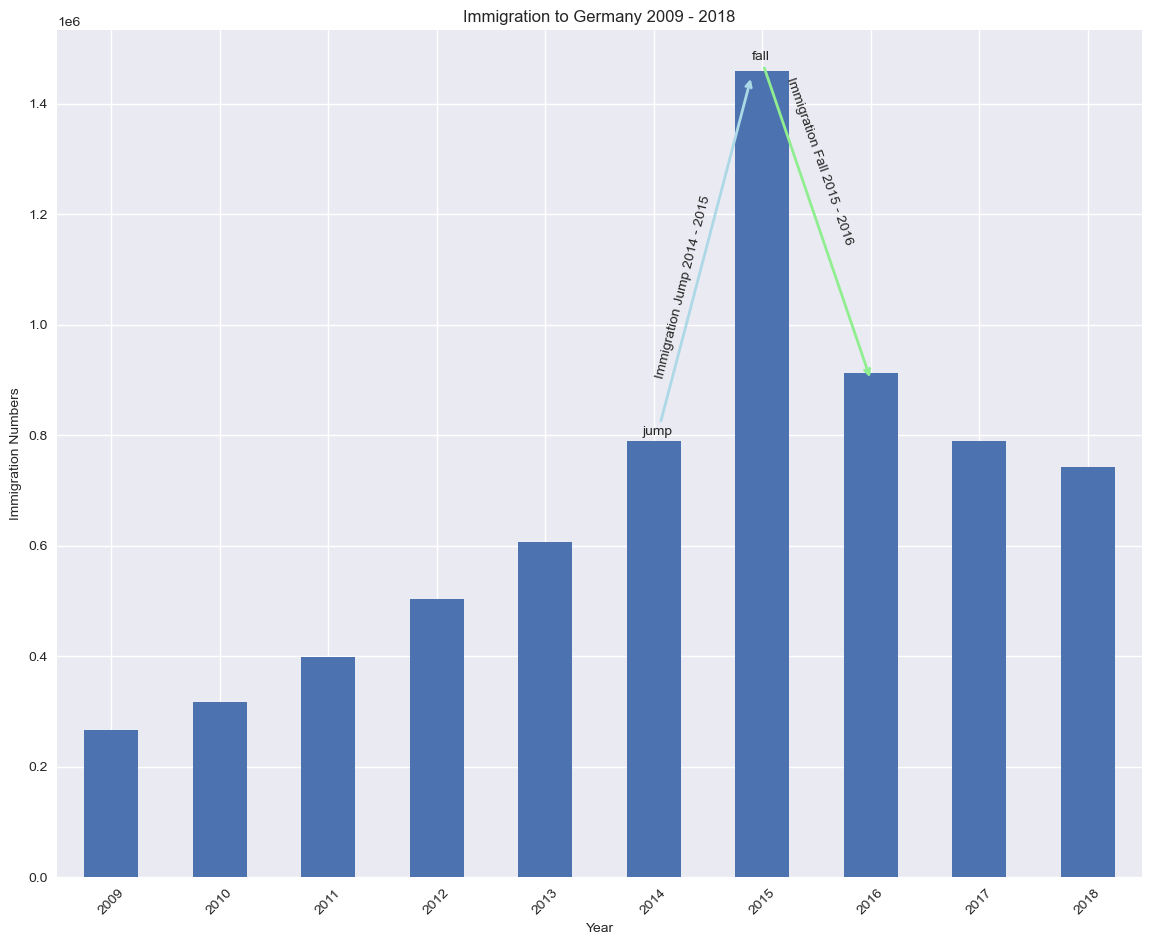

In [53]:
df_germany.plot(kind = 'bar', figsize=(14, 11), rot = 45)

plt.xlabel('Year')
plt.ylabel('Immigration Numbers')
plt.title('Immigration to Germany 2009 - 2018')


# message, coordinates of the end of the arrow, coordinates of the beginning of the arrow,
# xycoords = 'data' to use the same units as the plot,
# type of arrow with its connectionstyle, colour and thickness
plt.annotate('jump',
            xy = (5.9, 1.45*10**6),
            xytext = (4.9, 0.8*10**6),
            xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'lightblue', lw = 2))

plt.annotate('fall',
            xy = (7, 0.9*10**6),
            xytext = (5.9, 1.48*10**6),
            xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'lightgreen', lw = 2))

# Add text as well

plt.annotate('Immigration Jump 2014 - 2015',
             xy = (5, 0.9*10**6), 
             rotation = 75.7,
             va = 'bottom',
             ha = 'left')

plt.annotate('Immigration Fall 2015 - 2016',
             xy = (6.2, 1.45*10**6), 
             rotation = -70.5,
             va = 'top',
             ha = 'left')

plt.show()

## Histogram Plots

The histogram groups or "bins" datasets.

In [54]:
df_immigration[2015].head()

Country
Germany           1459919.0
United Kingdom     547828.0
Spain              290005.0
Italy              250026.0
France             232961.0
Name: 2015, dtype: float64

In [55]:
count, bins = np.histogram(df_immigration[2015])

# count is the frequency count

#bins is the divisions, which if not indicated, it defaults to 10

In [56]:
count

array([22,  4,  0,  1,  0,  0,  0,  0,  0,  1], dtype=int64)

In [57]:
bins

array([   3747. ,  149364.2,  294981.4,  440598.6,  586215.8,  731833. ,
        877450.2, 1023067.4, 1168684.6, 1314301.8, 1459919. ])

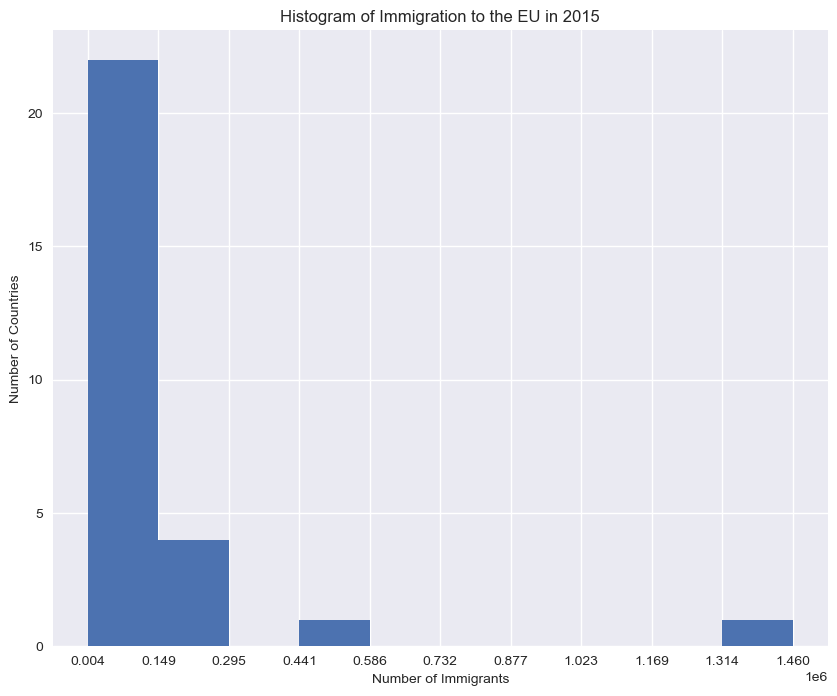

In [58]:
df_immigration[2015].plot(kind = 'hist', figsize=(10, 8), xticks = bins)

plt.title('Histogram of Immigration to the EU in 2015')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

Note that the units below are in factors of ten to the power of six (that is factors of a million)

Looking at the contribution to total immigration in the EU of four countries.

In [59]:
df_immigration.index.values

array(['Germany ', 'United Kingdom', 'Spain', 'Italy', 'France',
       'Netherlands', 'Belgium', 'Sweden', 'Austria', 'Poland', 'Greece',
       'Ireland', 'Denmark', 'Czech Republic', 'Hungary', 'Finland',
       'Luxembourg', 'Romania', 'Cyprus', 'Slovenia', 'Portugal', 'Malta',
       'Bulgaria', 'Croatia', 'Lithuania', 'Estonia', 'Slovakia',
       'Latvia'], dtype=object)

In [60]:
df_immigration.loc[['Romania', 'Belgium', 'Sweden', 'Austria'], [2013, 2014, 2015, 2016, 2017]].head()

,2013,2014,2015,2016,2017
Country,,,,,
Romania,14712.0,12104.0,17247.0,17895.0,26849.0
Belgium,105379.0,106047.0,127654.0,105368.0,108497.0
Sweden,94922.0,105575.0,113357.0,142452.0,124396.0
Austria,92585.0,106932.0,156543.0,119635.0,102015.0


In [61]:
df_four = df_immigration.loc[['Romania', 'Belgium', 'Sweden', 'Austria'], [2013, 2014, 2015, 2016, 2017]].transpose()
df_four.head()

Country,Romania,Belgium,Sweden,Austria
2013,14712.0,105379.0,94922.0,92585.0
2014,12104.0,106047.0,105575.0,106932.0
2015,17247.0,127654.0,113357.0,156543.0
2016,17895.0,105368.0,142452.0,119635.0
2017,26849.0,108497.0,124396.0,102015.0


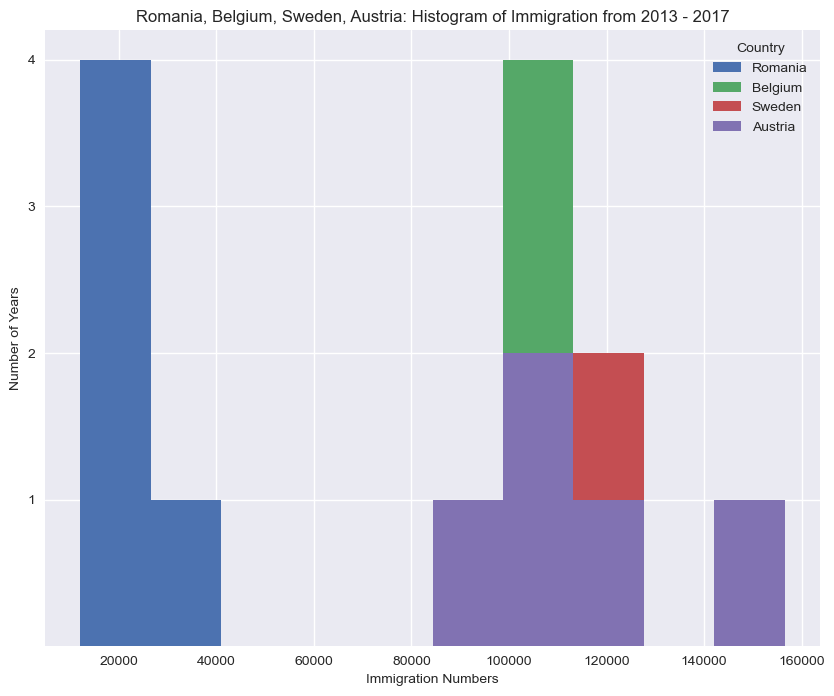

In [63]:
df_four.plot(kind = 'hist', figsize = (10, 8))

plt.title('Romania, Belgium, Sweden, Austria: Histogram of Immigration from 2013 - 2017')
plt.ylabel('Number of Years')
plt.xlabel('Immigration Numbers')
plt.yticks([1,2,3,4])

plt.show()

Making it more understandable by changing the bin number, the transparency, and the colours.

Also, note that the x "ticks" do not coincide with the bars. That will fix that as well.

The interpretation is clear though: each bar shows us how many years the given country had immigration numbers that correspond to the x-scale. For example, we can see that Romania has had four years of being (roughly) between 10000 and 25000, and one year between 25000 and 40000. 

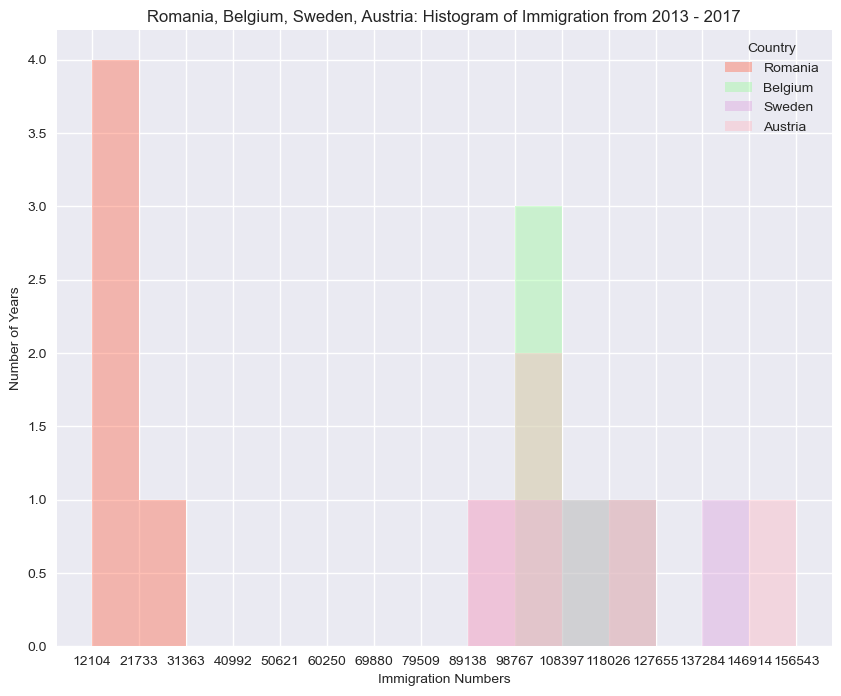

In [67]:
# colours: https://matplotlib.org/2.0.2/examples/color/named_colors.html

count, bins = np.histogram(df_four, 15)

df_four.plot(kind = 'hist', figsize = (10, 8), bins = 15, alpha = 0.4, xticks = bins, 
             color = ['tomato', 'palegreen', 'plum', 'lightpink'])

plt.title('Romania, Belgium, Sweden, Austria: Histogram of Immigration from 2013 - 2017')
plt.ylabel('Number of Years')
plt.xlabel('Immigration Numbers')

plt.show()

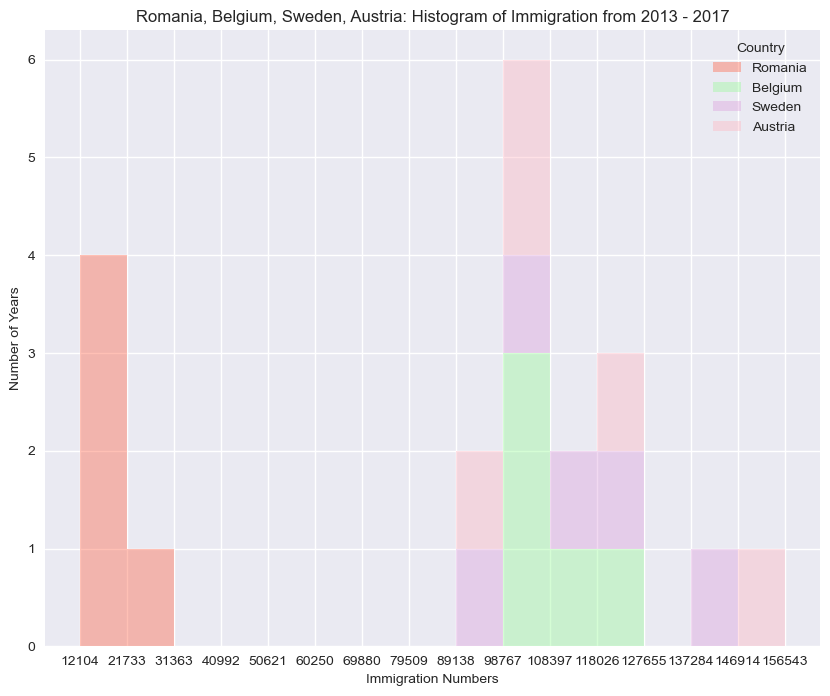

In [65]:
# Stacking the charts

count, bins = np.histogram(df_four, 15)

df_four.plot(kind = 'hist', figsize = (10, 8), bins = 15, alpha = 0.4, xticks = bins, 
             color = ['tomato', 'palegreen', 'plum', 'lightpink'], stacked = True)

plt.title('Romania, Belgium, Sweden, Austria: Histogram of Immigration from 2013 - 2017')
plt.ylabel('Number of Years')
plt.xlabel('Immigration Numbers')

plt.show()